<a name="top" id="top"></a>

<div align="center">
    <h1>CHE597 - Elements of Data Analysis - </h1>
    <a href="https://github.com/bernalde">David E. Bernal Neira</a>
    <br>
    <i>Davidson School of Chemical Engineering, Purdue University</i>
    <br>
    <a href="https://colab.research.google.com/github/SECQUOIA/PU_CHE597_S2025/blob/main/6b-EoA_Clustering/Elements_of_Data_Analysis.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
    <a href="https://secquoia.github.io/">
        <img src="https://img.shields.io/badge/🌲⚛️🌐-SECQUOIA-blue" alt="SECQUOIA"/>
    </a>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Elements-of-Data-Analysis" data-toc-modified-id="Elements-of-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Elements of Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Overview-of-the-plant-operation" data-toc-modified-id="Overview-of-the-plant-operation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview of the plant operation</a></span></li><li><span><a href="#Summary-of-Variables" data-toc-modified-id="Summary-of-Variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Summary of Variables</a></span></li><li><span><a href="#Reading-in-Data" data-toc-modified-id="Reading-in-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reading in Data</a></span></li><li><span><a href="#Examining-the-contents" data-toc-modified-id="Examining-the-contents-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examining the contents</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Removing Outliers</a></span><ul class="toc-item"><li><span><a href="#Robust-Z-Score" data-toc-modified-id="Robust-Z-Score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Robust Z-Score</a></span></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span><ul class="toc-item"><li><span><a href="#Simple-Example" data-toc-modified-id="Simple-Example-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Simple Example</a></span></li><li><span><a href="#Additional-Details-(optional)" data-toc-modified-id="Additional-Details-(optional)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Additional Details (optional)</a></span></li><li><span><a href="#PCA---Dow-Dataset" data-toc-modified-id="PCA---Dow-Dataset-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>PCA - Dow Dataset</a></span></li></ul></li></ul></li></ul></div>

In [14]:
# If using this on Google colab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


<b>If you are using google colab you should save this notebook and any associated textfiles to their own folder on your google drive. Then you will need to adapt the following commands so that the notebook runs from the location of that folder.</b>


In [ ]:
# If you want to use Google Drive to save/load files, set this to True
USE_GOOGLE_DRIVE = False
if IN_COLAB and USE_GOOGLE_DRIVE:
    from google.colab import drive
    drive.mount('/content/drive')

    # Colab command to navigate to the folder holding the homework,
    # CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
    # Note: if there are spaces in the path, you need to precede them with a backslash '\'
    %cd /content/drive/My\ Drive/CHE597/Lectures/6-Elements_of_Data_Analysis

## Elements of Data Analysis
In this notebook we will utilize a dataset generously supplied by Dow. This dataset is a time-series comprised of impurity in an output stream and sensor data associated with several unit operations. We'll revisit this dataset as the semester progresses, but here we will utilize it to illustrate basic elements of data analysis, including cleaning data and analyzing basic statistical quantities.  

### Overview of the plant operation

![dow.png](dow.png)

### Summary of Variables
The table below defines the variables for which we have data (huge thanks to Leo Chiang & Dow Chemical Co. for providing data). 
![dow_variables.png](dow_variables.png)

### Reading in Data
The first thing is to load the data. Dow has made this easy by providing an organized excel spreadsheet (`ImpurityDataset_Training.xlsx`) so we don't need to write our own parser: 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dow = pd.read_excel("ImpurityDataset_Training.xlsx")

In Jupyter, we can view pandas dataframes by just calling the dataframe directly:

In [16]:
dow

,Date,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,...,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
0,2015-12-01 00:00:00,327.813,45.7920,2095.06,2156.01,98.5005,95.4674,54.3476,41.0121,52.2353,...,62.8707,45.0085,66.6604,8.68813,99.9614,5.38024,1.49709,1.77833,3.32803,0.291226
1,2015-12-01 01:00:00,322.970,46.1643,2101.00,2182.90,98.0014,94.9673,54.2247,41.0076,52.5378,...,62.8651,45.0085,66.5496,8.70683,99.8637,5.33345,1.51392,1.76964,3.29556,0.294044
2,2015-12-01 02:00:00,319.674,45.9927,2102.96,2151.39,98.8229,96.0785,54.6130,41.0451,52.0159,...,62.8656,45.0085,66.0599,8.69269,100.2490,5.37677,1.50634,1.76095,3.23481,0.300552
3,2015-12-01 03:00:00,327.223,46.0960,2101.37,2172.14,98.7733,96.1223,54.9153,41.0405,52.9477,...,62.8669,45.0085,67.9697,8.70482,100.3200,5.32315,1.47935,1.75226,3.31287,0.293752
4,2015-12-01 04:00:00,331.177,45.8493,2114.06,2157.77,99.3231,94.7521,54.0925,40.9934,53.0507,...,62.8673,45.0085,67.6454,8.70077,100.6590,5.28227,1.44489,1.74357,3.33435,0.286107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,2017-02-18 19:00:00,397.654,48.9312,2302.54,2405.74,120.2160,116.8420,53.6651,40.9795,53.3360,...,62.9370,45.0085,71.3254,8.99703,121.7330,10.09520,2.15861,3.12650,3.30783,0.293829
10699,2017-02-18 20:00:00,394.109,48.9401,2290.11,2408.52,123.6580,118.0100,54.4188,41.0057,52.7054,...,62.9370,45.0085,73.9447,9.00320,124.9870,9.51403,2.21241,3.10883,3.18708,0.299435
10700,2017-02-18 21:00:00,396.095,48.8380,2296.40,2398.71,122.8430,119.7030,53.9685,40.9757,53.1350,...,62.9404,45.0085,71.8156,9.00187,124.2270,10.03550,2.17251,3.07895,3.22441,0.302209
10701,2017-02-18 22:00:00,392.233,49.0474,2287.61,2394.63,122.9340,119.9190,54.4196,41.0498,52.7341,...,62.9370,45.0085,72.0492,9.00924,124.4240,9.95938,2.15922,3.03684,3.19061,0.305736


### Examining the contents
We have a large block of data, but what exactly is it? We need to figure out what our headers are, how many missing values we have, and what our relevant output quantities are. 

First, let's just summarize the headers:

In [17]:
# Check the columns and datatypes
for i in dow.columns:
    print("{}: {}".format(i,dow[i].dtype))

Date: datetime64[ns]
x1:Primary Column Reflux Flow: float64
x2:Primary Column Tails Flow: float64
x3:Input to Primary Column Bed 3 Flow: float64
x4:Input to Primary Column Bed 2 Flow: float64
x5:Primary Column Feed Flow from Feed Column: float64
x6:Primary Column Make Flow: float64
x7:Primary Column Base Level: float64
x8:Primary Column Reflux Drum Pressure: float64
x9:Primary Column Condenser Reflux Drum Level: float64
x10:Primary Column Bed1 DP: float64
x11:Primary Column Bed2 DP: float64
x12:Primary Column Bed3 DP: float64
x13:Primary Column Bed4 DP: float64
x14:Primary Column Base Pressure: float64
x15:Primary Column Head Pressure: float64
x16:Primary Column Tails Temperature: float64
x17:Primary Column Tails Temperature 1: float64
x18:Primary Column Bed 4 Temperature: float64
x19:Primary Column Bed 3 Temperature: float64
x20:Primary Column Bed 2 Temperature: float64
x21:Primary Column Bed 1 Temperature: float64
x22: Secondary Column Base Concentration: float64
x23: Flow from Input

There are lots of variables here. Based on the description, the `xINT:` variables correspond to sensor readings and the `y:Impurity` variable is the process figure of merit that we are intent on predicting. Let's take a look at `y:Impurity` vs time to get a sense of the problem:

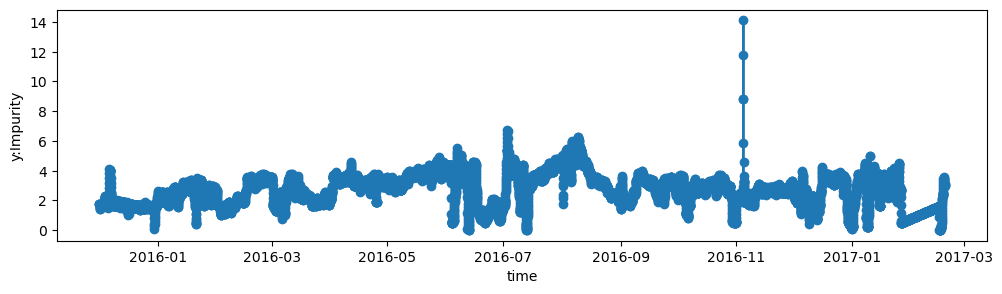

In [18]:
plt.figure(figsize=(12,3))
plt.plot(dow.iloc[:,0],dow.iloc[:,-3],marker='o')
plt.xlabel("time")
plt.ylabel("y:Impurity")
plt.show()

Here we can see potential issues with outliers. We can also see some strange behavior near the end, where the noise (which we expect) seems to go away and the impurity drifts linearly. Let's take a closer look:

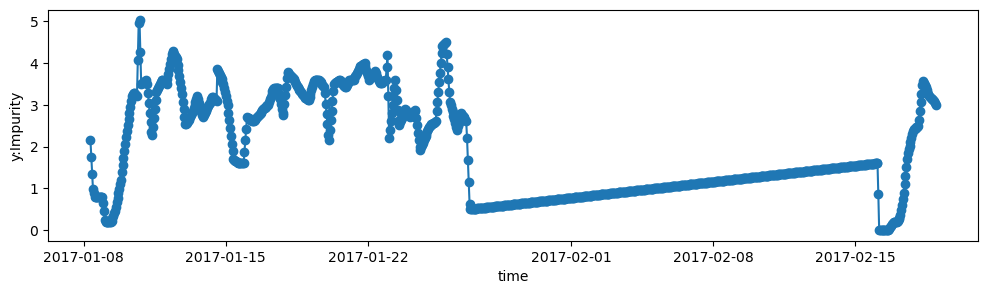

In [19]:
plt.figure(figsize=(12,3))
plt.plot(dow.iloc[-1000:,0],dow.iloc[-1000:,-3],marker='o')
plt.xlabel("time")
plt.ylabel("y:Impurity")
plt.show()

Something is clearly odd here. In fact, our friends at dow have told us that some of the units were shutdown during the period that these readings were taken, and identifying these periods is one of the challenges we'll discuss with this dataset in the next lecture. 

A second generic consideration with any dataset is identifying missing values. Let's write a pandas operation to identify how many missing values we have in every column: 

In [20]:
# Loop over columns and use .isna() and .sum() methods to identify NaN and sum their quantity, respectively
N = len(dow)
for i in dow.columns:
    N_missing = dow[i].isna().sum()
    print("{}: {} ({:4.2f}%)".format(i,N_missing,N_missing/N*100.0))

Date: 0 (0.00%)
x1:Primary Column Reflux Flow: 30 (0.28%)
x2:Primary Column Tails Flow: 22 (0.21%)
x3:Input to Primary Column Bed 3 Flow: 21 (0.20%)
x4:Input to Primary Column Bed 2 Flow: 21 (0.20%)
x5:Primary Column Feed Flow from Feed Column: 21 (0.20%)
x6:Primary Column Make Flow: 21 (0.20%)
x7:Primary Column Base Level: 21 (0.20%)
x8:Primary Column Reflux Drum Pressure: 21 (0.20%)
x9:Primary Column Condenser Reflux Drum Level: 19 (0.18%)
x10:Primary Column Bed1 DP: 19 (0.18%)
x11:Primary Column Bed2 DP: 19 (0.18%)
x12:Primary Column Bed3 DP: 19 (0.18%)
x13:Primary Column Bed4 DP: 20 (0.19%)
x14:Primary Column Base Pressure: 19 (0.18%)
x15:Primary Column Head Pressure: 21 (0.20%)
x16:Primary Column Tails Temperature: 19 (0.18%)
x17:Primary Column Tails Temperature 1: 19 (0.18%)
x18:Primary Column Bed 4 Temperature: 19 (0.18%)
x19:Primary Column Bed 3 Temperature: 19 (0.18%)
x20:Primary Column Bed 2 Temperature: 19 (0.18%)
x21:Primary Column Bed 1 Temperature: 19 (0.18%)
x22: Seconda

We have missing values, but in all cases it is only a fraction of a percent of the total data. Since it is such a small amount, let's remove all rows with missing data:

In [21]:
# Drop rows with any missing data
dow.dropna(how='any',inplace=True)

# Check that we successfully removed the missing values
print("number of missing values: {}".format(dow.isna().sum().sum()))

number of missing values: 0


Here we have checked that we successfully removed the missing values by recomputing the missing values with `.isna()` and doing a double summation. 

If you looked closely when you calculated the headers and datatypes, then you would also see that `x37:` has some missing values assigned as strings. We can also remove non-numeric values using the following bit of code:

In [22]:
cols=["x37: Feed Column Tails Flow to Primary Column"]# columns we want to remove non-numeric data from

# error='coerce' will return NaN if can't be converted to numeric.
dow[cols] = dow[cols].apply(pd.to_numeric,errors='coerce')

# drop rows with missing values 
dow.dropna(how='any',inplace=True)

# Check that we successfully removed the missing values
print("number of missing values: {}".format(dow.isna().sum().sum()))

number of missing values: 0


Let's replot the impurity and see if the trends have qualitatively changed: 

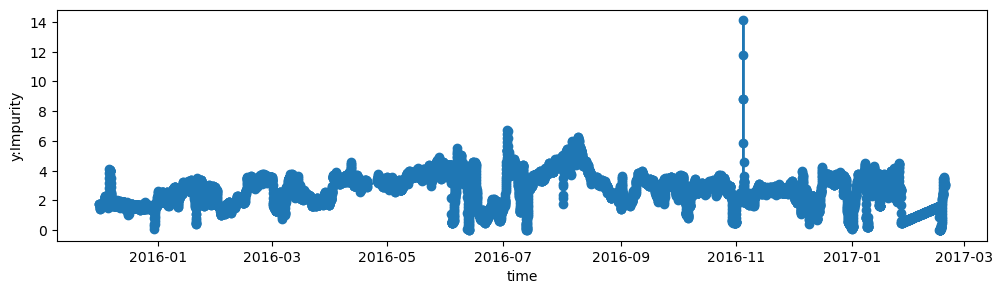

In [23]:
# Check the impurity plot    
plt.figure(figsize=(12,3))
plt.plot(dow.iloc[:,0],dow.iloc[:,-3],marker='o')
plt.xlabel("time")
plt.ylabel("y:Impurity")
plt.show()

Comparing the resulting impurity plot with the original, we can see that it is largely unchanged. If you look closely you can see a gap in april-2016 and some other missing points. Our eventual goal with this dataset will be to predict the impurity based on the sensor readings. In the current case, even with the removed values we still have plenty of data for training such a model (this might not always be the case, and sometimes missing values are themselves a useful predictor for modeling).  

### Correlations
We have a lot of sensor readings related to the unit operations (40 of them). Absent other knowledge, we don't know if these are all important, if none of them are important, or if we actually need even more variables to construct a useful model. 

When you have a lot of variables, a simple and informative thing to calculate is the linear correlation coefficient:

$r_{xy} = \frac{\sum_{i}\left(x_i - \mu_x\right)\left(y_i - \mu_y\right)}{\sqrt{\sum_i \left(x_i - \mu_x\right)^2}\sqrt{\sum_i \left(y_i - \mu_y\right)^2}}$

Where $x_i$ and $y_i$ are the values of properties $X$ and $Y$ at a given time $i$, and $\mu_x$ and $\mu_y$ are the average values of $X$ and $Y$ over the dataset. This quantity (which you have probably seen before, but if not you should certainly internalize), is bounded between -1 and 1, and tells us if the two variables $X$ and $Y$ tend to move together. Specifically, the numerator holds the sum of products between $x_i$ fluctations from its mean and $y_i$ fluctuations from its mean. If these fluctuations happen in the same direction the coefficient will tend toward 1, if they typically happen in opposite directions the coefficient will tend towards -1, and if they don't move together in a linear fashion then it will tend towards 0. Since $X$ and $Y$ have potentially different units and variance, the denominator normalizes these fluctations by each variable's standard deviation.  

We care about correlation, because it is simplest opportunity for finding important variables for predicting our property of interest. In this course, we will typically focus on problems where linear regression doesn't work, but if you happen to have good linear predictor variables, that is wonderful and you should identify this right away. 

Thankfully, Pandas has a built-in method for calculating the correlation between columns:

In [24]:
corr = dow.corr()
corr

,Date,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,...,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,1.000000,-0.266811,-0.268958,0.140706,-0.259891,-0.296091,-0.288894,-0.242609,-0.332783,-0.301012,...,-0.297909,-0.101549,-0.187006,-0.326604,-0.298492,0.250210,-0.132035,0.011287,0.018953,-0.026926
x1:Primary Column Reflux Flow,-0.266811,1.000000,0.840909,0.638107,0.790147,0.915221,0.869800,0.733663,0.565074,0.788199,...,0.689768,0.470948,0.613797,0.762032,0.909378,0.706999,0.852385,0.529820,0.008352,0.049966
x2:Primary Column Tails Flow,-0.268958,0.840909,1.000000,0.755112,0.879539,0.739763,0.698189,0.845652,0.622606,0.884212,...,0.754131,0.540855,0.668350,0.814919,0.745062,0.517891,0.664198,0.277642,0.004357,0.040210
x3:Input to Primary Column Bed 3 Flow,0.140706,0.638107,0.755112,1.000000,0.703178,0.621706,0.611063,0.657509,0.319365,0.687136,...,0.619985,0.535161,0.581383,0.681222,0.621492,0.691601,0.638122,0.328518,-0.030249,0.053109
x4:Input to Primary Column Bed 2 Flow,-0.259891,0.790147,0.879539,0.703178,1.000000,0.732774,0.702620,0.726438,0.560686,0.780996,...,0.645427,0.569785,0.595774,0.751539,0.739285,0.505818,0.678863,0.383029,-0.047659,0.047871
x5:Primary Column Feed Flow from Feed Column,-0.296091,0.915221,0.739763,0.621706,0.732774,1.000000,0.949683,0.662324,0.461143,0.722785,...,0.777537,0.555507,0.730696,0.858223,0.993502,0.774289,0.930925,0.592390,-0.054194,0.082852
x6:Primary Column Make Flow,-0.288894,0.869800,0.698189,0.611063,0.702620,0.949683,1.000000,0.616827,0.408036,0.665838,...,0.703651,0.507520,0.683486,0.804732,0.935731,0.815685,0.977973,0.580705,-0.050222,0.100181
x7:Primary Column Base Level,-0.242609,0.733663,0.845652,0.657509,0.726438,0.662324,0.616827,1.000000,0.652882,0.893422,...,0.737016,0.517494,0.610898,0.713077,0.668859,0.484338,0.590445,0.310600,-0.039838,0.039541
x8:Primary Column Reflux Drum Pressure,-0.332783,0.565074,0.622606,0.319365,0.560686,0.461143,0.408036,0.652882,1.000000,0.643621,...,0.609575,0.409469,0.535567,0.477483,0.472016,0.237274,0.368526,0.218764,0.002466,0.014189
x9:Primary Column Condenser Reflux Drum Level,-0.301012,0.788199,0.884212,0.687136,0.780996,0.722785,0.665838,0.893422,0.643621,1.000000,...,0.778568,0.542581,0.654300,0.785139,0.734560,0.498706,0.630677,0.297110,-0.047863,0.026925


This is a lot of data to digest at one time. It is much better to visualize, using a so-called correlation matrix (a N_var x N_var plot with z-colored by correlation). You can do this in Pandas using the built-in print functionality and setting the background color: 

In [25]:
corr.style.background_gradient(cmap='PRGn').format(precision=2)

,Date,x1:Primary Column Reflux Flow,x2:Primary Column Tails Flow,x3:Input to Primary Column Bed 3 Flow,x4:Input to Primary Column Bed 2 Flow,x5:Primary Column Feed Flow from Feed Column,x6:Primary Column Make Flow,x7:Primary Column Base Level,x8:Primary Column Reflux Drum Pressure,x9:Primary Column Condenser Reflux Drum Level,x10:Primary Column Bed1 DP,x11:Primary Column Bed2 DP,x12:Primary Column Bed3 DP,x13:Primary Column Bed4 DP,x14:Primary Column Base Pressure,x15:Primary Column Head Pressure,x16:Primary Column Tails Temperature,x17:Primary Column Tails Temperature 1,x18:Primary Column Bed 4 Temperature,x19:Primary Column Bed 3 Temperature,x20:Primary Column Bed 2 Temperature,x21:Primary Column Bed 1 Temperature,x22: Secondary Column Base Concentration,x23: Flow from Input to Secondary Column,x24: Secondary Column Tails Flow,x25: Secondary Column Tray DP,x26: Secondary Column Head Pressure,x27: Secondary Column Base Pressure,x28: Secondary Column Base Temperature,x29: Secondary Column Tray 3 Temperature,x30: Secondary Column Bed 1 Temperature,x31: Secondary Column Bed 2 Temperature,x32: Secondary Column Tray 2 Temperature,x33: Secondary Column Tray 1 Temperature,x34: Secondary Column Tails Temperature,x35: Secondary Column Tails Concentration,x36: Feed Column Recycle Flow,x37: Feed Column Tails Flow to Primary Column,x38: Feed Column Calculated DP,x39: Feed Column Steam Flow,x40: Feed Column Tails Flow,Avg_Reactor_Outlet_Impurity,Avg_Delta_Composition Primary Column,y:Impurity,Primary Column Reflux/Feed Ratio,Primary Column Make/Reflux Ratio
Date,1.00,-0.27,-0.27,0.14,-0.26,-0.30,-0.29,-0.24,-0.33,-0.30,-0.12,-0.19,-0.21,-0.41,-0.34,-0.33,0.02,-0.13,-0.35,-0.35,-0.34,-0.32,0.25,-0.57,-0.14,-0.36,-0.33,-0.34,-0.31,-0.18,-0.22,-0.25,-0.01,-0.30,-0.29,0.05,-0.30,-0.10,-0.19,-0.33,-0.30,0.25,-0.13,0.01,0.02,-0.03
x1:Primary Column Reflux Flow,-0.27,1.00,0.84,0.64,0.79,0.92,0.87,0.73,0.57,0.79,0.80,0.85,0.83,0.77,0.67,0.60,0.19,0.11,0.81,0.81,0.80,0.79,-0.77,0.42,0.70,0.67,0.68,0.69,0.70,0.37,0.49,0.57,0.23,0.36,0.81,-0.16,0.69,0.47,0.61,0.76,0.91,0.71,0.85,0.53,0.01,0.05
x2:Primary Column Tails Flow,-0.27,0.84,1.00,0.76,0.88,0.74,0.70,0.85,0.62,0.88,0.45,0.48,0.46,0.49,0.67,0.64,0.18,0.20,0.92,0.91,0.90,0.87,-0.92,0.50,0.74,0.86,0.68,0.69,0.84,0.48,0.56,0.62,0.42,0.63,0.95,-0.21,0.75,0.54,0.67,0.81,0.75,0.52,0.66,0.28,0.00,0.04
x3:Input to Primary Column Bed 3 Flow,0.14,0.64,0.76,1.00,0.70,0.62,0.61,0.66,0.32,0.69,0.44,0.38,0.31,0.41,0.37,0.34,0.19,0.12,0.61,0.61,0.61,0.61,-0.71,0.01,0.72,0.62,0.39,0.40,0.60,0.35,0.39,0.43,0.31,0.48,0.70,-0.16,0.62,0.54,0.58,0.68,0.62,0.69,0.64,0.33,-0.03,0.05
x4:Input to Primary Column Bed 2 Flow,-0.26,0.79,0.88,0.70,1.00,0.73,0.70,0.73,0.56,0.78,0.53,0.50,0.46,0.55,0.61,0.58,0.24,0.20,0.81,0.80,0.79,0.78,-0.79,0.59,0.82,0.70,0.62,0.64,0.72,0.36,0.44,0.54,0.35,0.54,0.82,-0.18,0.65,0.57,0.60,0.75,0.74,0.51,0.68,0.38,-0.05,0.05
x5:Primary Column Feed Flow from Feed Column,-0.30,0.92,0.74,0.62,0.73,1.00,0.95,0.66,0.46,0.72,0.80,0.83,0.79,0.80,0.57,0.50,0.22,0.07,0.69,0.69,0.68,0.68,-0.66,0.33,0.73,0.60,0.59,0.59,0.60,0.33,0.42,0.50,0.13,0.35,0.69,-0.13,0.78,0.56,0.73,0.86,0.99,0.77,0.93,0.59,-0.05,0.08
x6:Primary Column Make Flow,-0.29,0.87,0.70,0.61,0.70,0.95,1.00,0.62,0.41,0.67,0.76,0.80,0.78,0.80,0.52,0.44,0.21,0.05,0.62,0.62,0.62,0.62,-0.60,0.31,0.67,0.57,0.53,0.54,0.55,0.28,0.36,0.43,0.07,0.30,0.63,-0.12,0.70,0.51,0.68,0.80,0.94,0.82,0.98,0.58,-0.05,0.10
x7:Primary Column Base Level,-0.24,0.73,0.85,0.66,0.73,0.66,0.62,1.00,0.65,0.89,0.44,0.46,0.42,0.44,0.69,0.67,0.17,0.18,0.89,0.89,0.90,0.88,-0.91,0.44,0.68,0.72,0.69,0.70,0.80,0.58,0.70,0.75,0.46,0.60,0.91,-0.17,0.74,0.52,0.61,0.71,0.67,0.48,0.59,0.31,-0.04,0.04
x8:Primary Column Reflux Drum Pressure,-0.33,0.57,0.62,0.32,0.56,0.46,0.41,0.65,1.00,0.64,0.34,0.35,0.34,0.30,0.99,1.00,0.09,0.18,0.77,0.77,0.78,0.81,-0.64,0.49,0.56,0.51,0.98,0.98,0.63,0.49,0.62,0.68,0.42,0.49,0.71,-0.16,0.61,0.41,0.54,0.48,0.47,0.24,0.37,0.22,0.00,0.01
x9:Primary 

More succinctly, you can use matplotlib to make an actual plot of the matrix using the `plt.matshow` function:

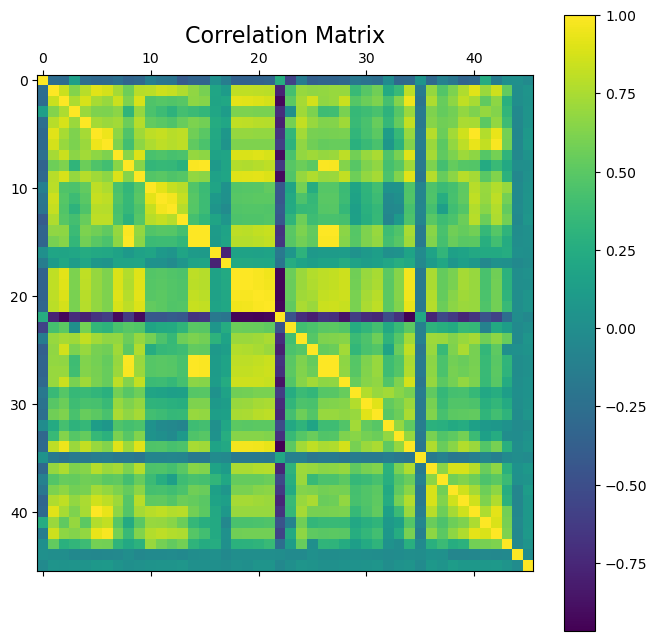

In [26]:
plt.figure(figsize=(8,8))
plt.matshow(corr,fignum=0) # atypical behavior, makes a new fig by default, 0 adds to current
plt.colorbar() # add colorbar
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Two things are universal about these plots. First, the matrix is symmetric (i.e., $A=A^\mathrm{T}$), because $r_{xy}=r_{yx}$. So only half of the matrix holds unique information. Second, there is a bright strip of yellow along the diagonal, corresponding to a correlation of 1. This is because $r_{xx}=1$ by definition. 

More significantly for this dataset, we also see a lot of bright yellow patches and dark purple patches along the off diagonal. These correspond to situations where the variables are strongly correlated, or anti-correlated. For the purposes of building a model, this means that these variables hold redundant information. If you know what one is, then you can predict what the other is (depending on the level of correlation), this might form a basis for removing  variables from a model.

Since we are interested in impurity, let's take a look at the five most linearly correlated features with `y:Impurity`:

In [27]:
# Check the five most linearly correlated variables with impurity
print("y-correlations:\n")
lab = corr['y:Impurity'].abs().nlargest(6).index
print(corr['y:Impurity'][lab[1:]])

y-correlations:

x10:Primary Column Bed1 DP                      0.700183
Avg_Delta_Composition Primary Column            0.618379
Avg_Reactor_Outlet_Impurity                     0.596340
x5:Primary Column Feed Flow from Feed Column    0.592390
x11:Primary Column Bed2 DP                      0.589071
Name: y:Impurity, dtype: float64


Here I have used the `abs` method so that we find the largest <i>magnitude</i> correlations, not just positive correlations. I've also returned the top 6 correlated variables, and thrown out the first, because `y:impurity` is trivially the most correlated variable with itself. None of these show a particularly strong correlation individually (in keeping with this being a challenging prediction problem). 

A second plot that is useful for visualizing correlations is a parity plot, where we plot two variables against one another: 

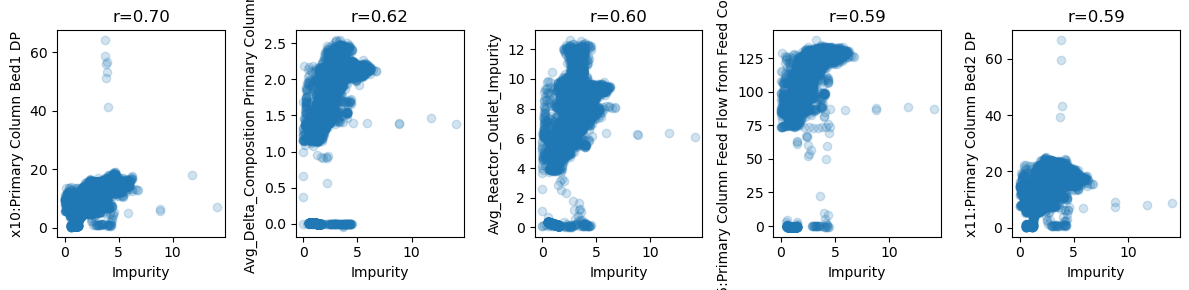

In [28]:
plt.figure(figsize=(12,3))
for count_i,i in enumerate(lab[1:]):
    ax = plt.subplot(1,5,count_i+1)
    plt.scatter(dow["y:Impurity"],dow[i],alpha=0.2)
    plt.title("r={:4.2f}".format(corr.loc['y:Impurity'][i]))
    plt.xlabel("Impurity")
    plt.ylabel(i)
plt.tight_layout() # Useful for removing overlaps in subplots
plt.show()

We also saw in the correlation matrix that several of the variables were correlated with one another. Let's find the five most correlated pairs of variables: 

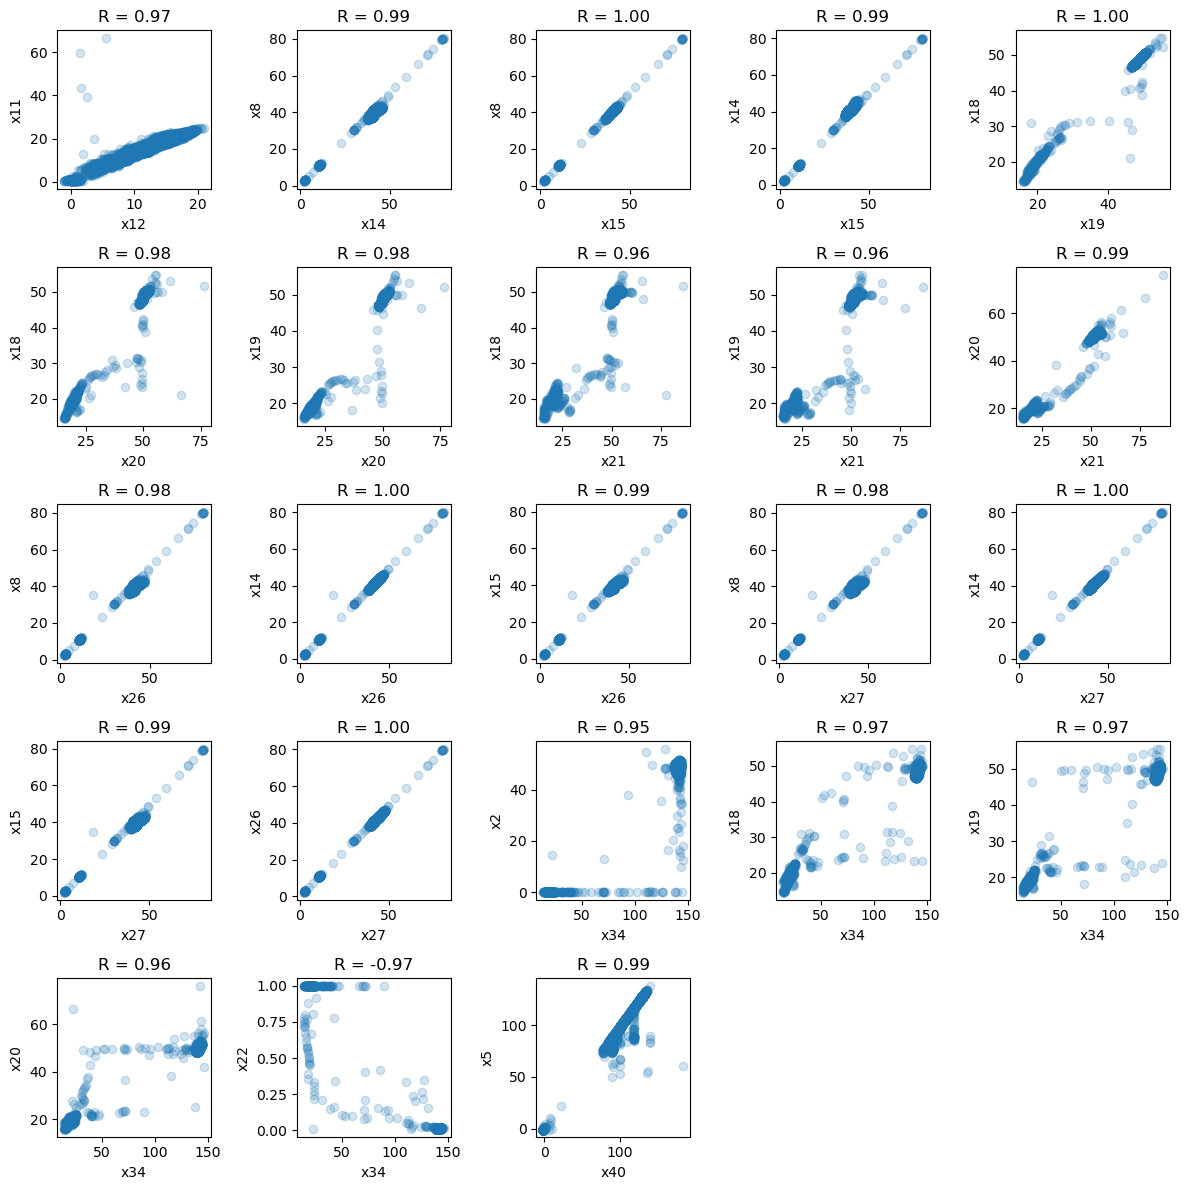

In [29]:
# Find linearly correlated features 
# There is probably a solution with Pandas .where() that is workable as well. I'm more comfortable with arrays.
corr_array = corr.abs().to_numpy()[:-5,:-5] # return a numpy array with only absolute values of "xINT:" variables
row,col = np.where((corr_array > 0.95) & (corr_array < 1)) # find positions where correlation mags are >0.95 and !=1
labels = [ (corr.index[row[_]],corr.columns[col[_]]) for _ in range(len(row)) if row[_] > col[_] ] # find labels/cols

### Correlation Grid of features
plt.figure(figsize=(12,12))
inc = -1
for i in range(len(labels)):
  ax = plt.subplot(5,5,i+1)
  ax.scatter(dow.loc[:,labels[i][0]],dow.loc[:,labels[i][1]],alpha=0.2)
  ax.set_title("R = {:<3.2f}".format(corr.loc[labels[i][0],labels[i][1]]))
  ax.set_xlabel(labels[i][0].split(":")[0])
  ax.set_ylabel(labels[i][1].split(":")[0])
plt.tight_layout()
plt.show()

We've just uncovered a lot of interesting relationships. First, there are several variables that are strongly correlated and likely redundant (e.g., `x8`,`x14`,`x15`,`x26`, and `x27` which all correspond to pressure in different unit ops). 

Second, we also see strong linear correlations among variables whose parity plots contain obvious outliers. For example, in the `x11` vs `x12` plot there is a strong correlation, but there are a small number of outliers that throw off the axes. Plotting with transparent markers helps to identify these as low density compared with the overwhelming linear trend. 

Third, we also see several cases where there is a strong linear correlation, but sparse data. For example, `x34` vs `x18` has a strong correlation ($r=0.97$) but when we inspect the plot, we see that this linear correlation is driven by essentially two discrete values:

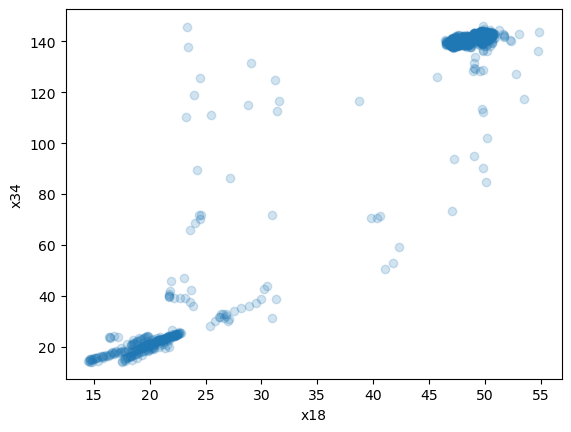

In [30]:
# Save the original header labels and rename working labels
h_0 = dow.columns
dow.columns = [ _.split(':')[0] for _ in dow.columns ]

# Make the plot
plt.scatter(dow["x18"],dow["x34"],alpha=0.2)
plt.xlabel("x18")
plt.ylabel("x34")
plt.show()

These variables correspond to the temperature in the beds of the primary and secondary column. There is a large density of points at ~(20,20) and ~(50,140) respectively, with hardly any values in between. We know from our friends at Dow that some of the units were off during the time we have data for. Looking at this plot we might guess that the "off-temperature" of both is ambient ~20C (and strongly correlated), and the target "on-temperature" is 50C and 140C respectively. Their strong correlation comes from the fact that they were off or on at the same times, not that they varied linearly during operation. 

## Removing Outliers
Removing outliers (i.e., samples that we consider unrepresentative or not a true member of the population we are investigating) is highly problem specific and there are no black-box methods that should be universally used. This is because classifying something as an outlier depends on 1) your <b>domain knowledge</b> of what the data represents, 2) what you want to <b>predict</b> from the data, and 3) your <b>model</b> of the data. 

Taking each in order, your domain knowledge plays an important role in understanding if something is an outlier. In the Dow example, we have sensor data on many variables, including things like pressure, concentration, and temperature, as a function of time. Our domain knowledge includes our understanding of how these variables are capable of changing in time. For example, our understanding of physics tells us that pressure can change very quickly, while large temperature changes will be limited by the heat capacities and thermal conductivities of the components. We would consult this knowledge when considering whether a sudden large fluctuation in temperature or pressure were "real" or an "outlier" that should be removed from our dataset. These kinds of references to domain knowledge are extremely common in identifying outliers, and are by definition left out when naively applying a one-size-fits-all method.

Second, what we want to predict also determines what data we might classify as outliers. Suppose we only want to predict seasonal trends. In that case, we might discard large fluctuations in certain variables that only occur over short time periods before trying to build our model. In this case, we would be classifying samples as outliers or replacing them, <i>not because they are unphysical</i>, but because they are unimportant with respect to our prediction target. The reference to our prediction objective is another reason why a one-size-fits-all approach does not exist.

Third, our model of the data will often influence what we consider an outlier. For example, typical outlier classification procedures depend on calculating a z-score (i.e., a normalized magnitude of the deviation from normal/gaussian behavior) for each observation and removing values that are larger than some threshold. In such a procedure, we are assuming that our variable should obey gaussian statistics. We may have good reason for assuming this (point 1), or it may just be a convenient way of modeling the random variable (related to point 2). But in this case, we would be classifying outliers based on <b>our model of the data</b>, not because we necessarily had evidence that the sample was unphysical or incorrect. Keeping track of our model of the data (and the assumptions that come along with that model) is an important factor in applying any outlier removal algorithm. All outlier classifications have assumptions that may or may not be applicable to our problem, this is another reason why a one-size-fits-all approach does not exist. 

### Robust Z-Score
The simplest methods for identifying outliers assume that data obeys normal statistics. Under circumstances where the central limit theorem applies (i.e., observables that are plausibly governed by a large number of independent stochastic factors), normal statistics are expected. Likewise, even when the central limit doesn't necessaarily obtain, the corresponding distribution may be sufficiently normal to justify approximation with a gaussian. Finally, you may sometimes simply assume normal statistics for convenience while understanding that you may be throwing out real values. Regardless of the circumstances, you should think carefully when you use any method that assumes an underlying data distribution. In particular, just because you might see normal statistics assumed in the literature without justification does not mean it is right!

When assuming normal statistics, a typical approach for classifying outliers is based on whether a sample deviates from the mean beyond a given threshold. The z-score of a sample is the deviation from the mean normalized by the standard deviation:

$$z_{i} = \frac{x_{i} - \mu_x}{\sigma_x}$$

Under the hypothesis that the data obeys normal statistics, the z-score can be related to the probability of observation using the cumulative normal distribution function. For example, 68% of samples would have a z-score between -1 and 1, 95% between -2 and 2, and 99.7% between -3 and 3. If you observe a sample with a z-score of 4 in a dataset of 100 values, you might reasonably conclude that this is an outlier and would want to remove it or replace it (usually with the mean or median). 

This sounds simple: we just need to calculate the z-scores, compare with a threshold, and then replace or remove the outliers. However, if outliers <i>are</i> in the sample, then they will affect the calculation of the mean ($\mu_x$) and standard deviation ($\sigma_x$). How can we calculate the mean from a sample that contains outliers? This is the motivation for the <b>robust z-score</b>. The fundamental observation is that the <b>median</b> of a sample is an <b>unbiased estimator</b> for the mean. Although the sample mean is typically the most efficient estimator of the population mean, <i>the median is much less affected by outliers</i>. We can calculate a (robust) z-score based on the sample median instead of the mean as:

$$z_{i} = \frac{\left|x_{i}-\mathrm{med}(X)\right|}{1.4826 \cdot MAD}$$

$$MAD=\mathrm{med}(X-\mathrm{med}(X))$$

Here the MAD is the median absolute deviation from the median ($\mathrm{med}(X)$), and the factor $1.4296$ is a scale factor that relates the MAD to the standard deviation (in this case assuming a gaussian distribution, for other distributions a different scale factor would be used).

When utilizing the robust z-score for time-series data, it makes the most physical sense to apply it to a running window of values. For each sample, one calculates the robust z-score for the center of the window. If the robust z-score exceeds a threshold then the value is replaced by the median of the window. This strategy for removing outliers from time-series data is known as a <b>Hampel Filter</b>. We can easily implement one ourselves in python:  

In [31]:
# X:       data as a numpy array,
# w:       window size for median calculation (+/- this number of samples)
# n_sig:   float holding the threshold number of sigma values to use as a cutoff for classifying outliers
# k:       scale factor for converting MAD to stdev (default: 1.4826 for normal distribution)
def hampel(x,w,n_sig=3.0,k=1.4826):

    # Check that the length is at least 2w
    assert len(x) > 2*w,"x isn't long enough to filter"

    # Copy array so that updates don't conflict with median calulation
    y = x.copy() 

    # Calculate length and initialize lists
    N = len(y)
    z = [0.0]*N    # list for holding z-scores
    o = [False]*N  # list of holding True/False outlier spec
    for i in range(w,N-w):
        med  = np.median(x[i-w:i+w+1])
        mad  = k*np.median(np.abs(x[i-w:i+w+1]-med))
        z[i] = np.abs(x[i]-med)/mad
        if z[i] > n_sig:
            y[i] = med
            o[i] = True

    return y,z,o     

Let's apply it to the dow dataset with a few values of threshold and see which values it identifies as outliers. 

n_sig=1.0: 2157 outliers (0.00%)


<Figure size 1200x300 with 0 Axes>

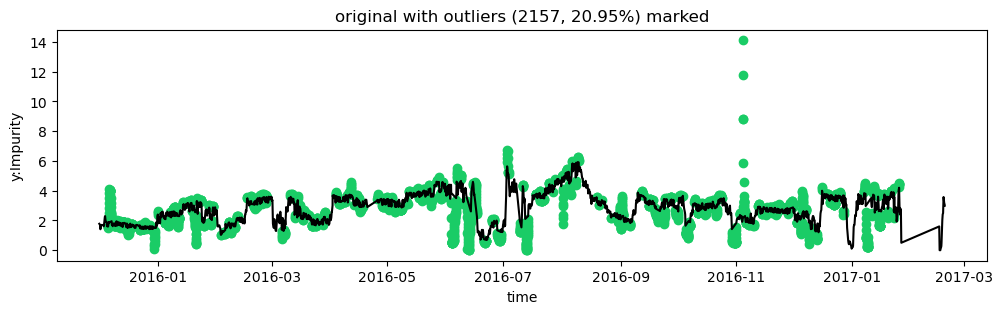

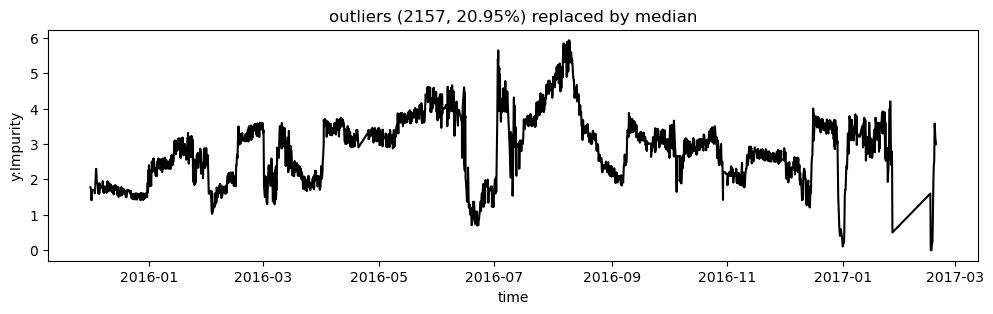

n_sig=2.0: 545 outliers (0.00%)


<Figure size 1200x300 with 0 Axes>

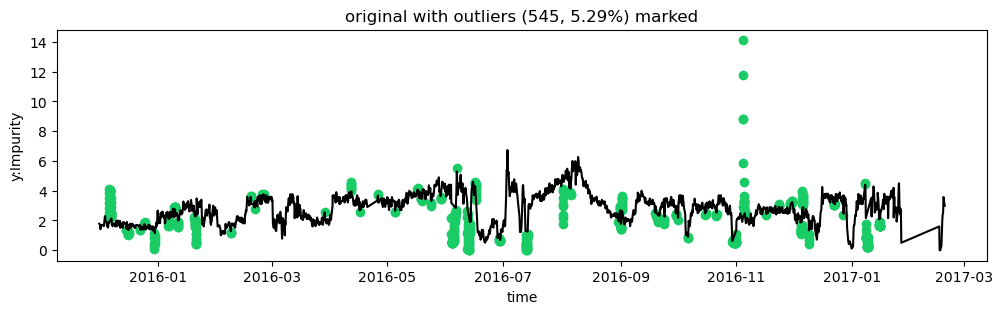

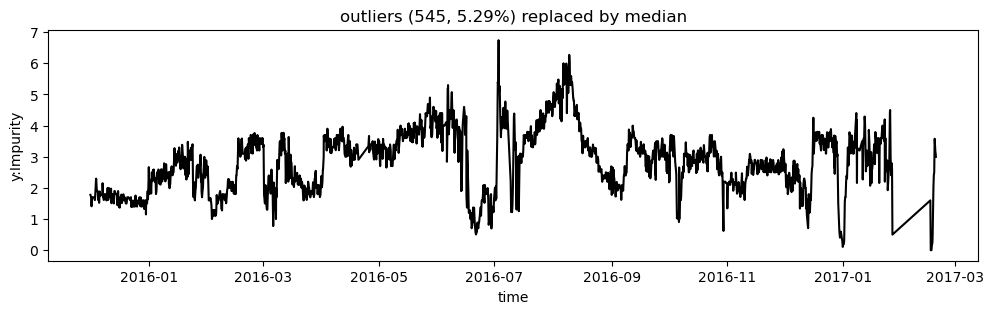

n_sig=3.0: 263 outliers (0.00%)


<Figure size 1200x300 with 0 Axes>

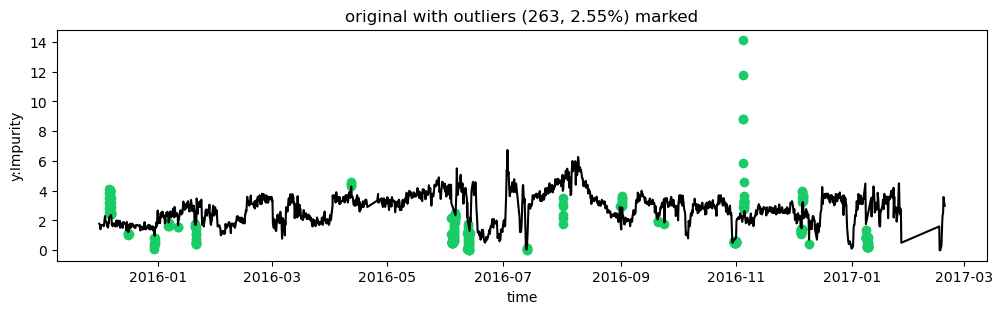

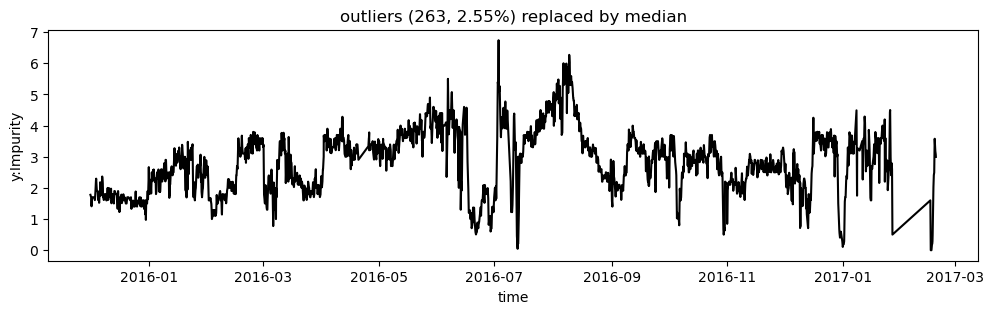

n_sig=4.0: 160 outliers (0.00%)


<Figure size 1200x300 with 0 Axes>

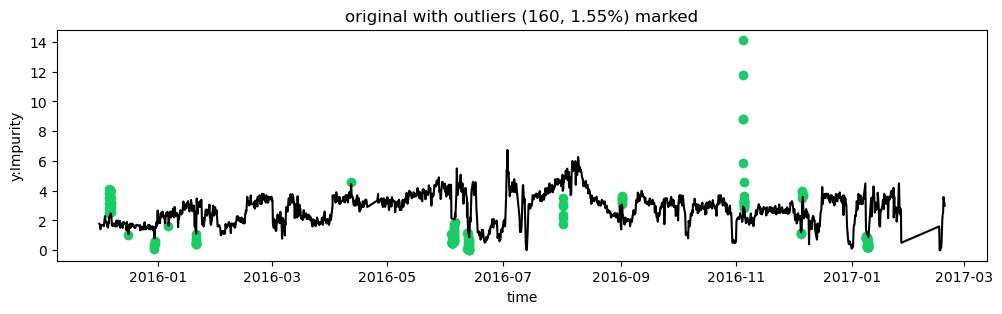

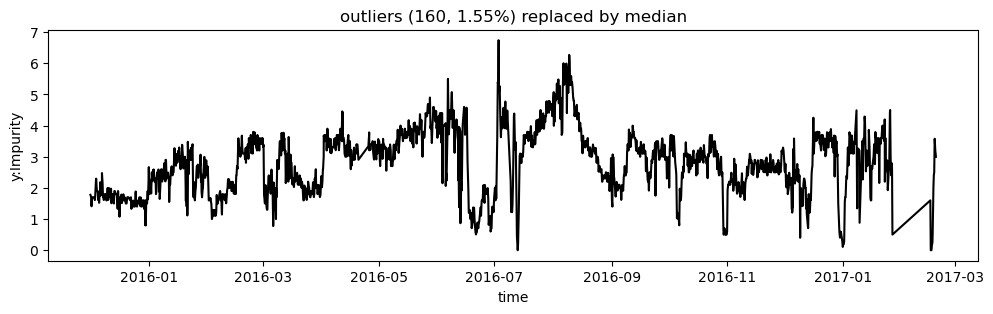

In [32]:
for i in np.arange(1.0,5.0):
    y,z,o = hampel(dow["y"].to_numpy(),w=100,n_sig=i)
    print("n_sig={}: {} outliers ({:<4.2f}%)".format(i,sum(o),sum(o)/float(len(o)*100.0)))
    plt.figure(figsize=(12,3))
    o_inds = [ count for count,_ in enumerate(o) if _ is True ]
    i_inds = [ count for count,_ in enumerate(o) if _ is False ]

    # Plot original data with outliers marked
    plt.figure(figsize=(12,3))
    plt.plot(dow.iloc[o_inds,0],dow.iloc[o_inds,-3],marker='o',color=(0.1,0.8,0.4),linestyle='None')
    plt.plot(dow.iloc[i_inds,0],dow.iloc[i_inds,-3],color="k")
    plt.xlabel("time")
    plt.ylabel("y:Impurity")
    plt.title("original with outliers ({:d}, {:<4.2f}%) marked".format(sum(o),sum(o)/float(len(o))*100.0))
    
    # Plot original data with outliers replaced by median
    plt.figure(figsize=(12,3))
    plt.plot(dow.iloc[:,0],y,color="k")
    plt.xlabel("time")
    plt.ylabel("y:Impurity")
    plt.title("outliers ({:d}, {:<4.2f}%) replaced by median".format(sum(o),sum(o)/float(len(o))*100.0))
    
    plt.show()

The above cell demonstrates the typical behavior for a Hampel filter: it successfully identifies large fluctuations and replaces them with the median. As the `n_sig` parameter decreases, more data is removed. This behavior is intuitive and is often exactly what we want. However, in all cases we end up removing the large impurity peak that occured ~2016-12. <i>Is this what we want?</i> If you were trying to improve the plant and that reading is real, isn't that precisely the kind of event that you would want to predict? Classifying large but real fluctations as outliers is a danger of the Hampel filter. It is possible that we could still build a predictive model, even without this data, but we might be leaving a critical source of information out. 

### Principal Component Analysis (PCA)
PCA is an important method for identifying "important" dimensions in a high dimensional dataset. Specifically, PCA analysis performs a rotation of the data into a coordinate frame where the greatest variance occurs along the first dimension (PC1), the next greatest variance occurs along the second principle dimension (PC2), and so on. Here we will use PCA to visualize our large dimensional Dow dataset along a new set of dimensions that capture the most variance in the data. Although, PCA isn't itself a method for identifying outliers, in a case like the Dow dataset where we expect the data to be contaminated by periods where units are off, we can potentially use PCA to identify where this occurs in the feature (`x:`) space.

#### Simple Example
Before getting into specifics, let's look at an illustration of what PCA does to a two-dimensional dataset based on gaussian distributed x and y values:

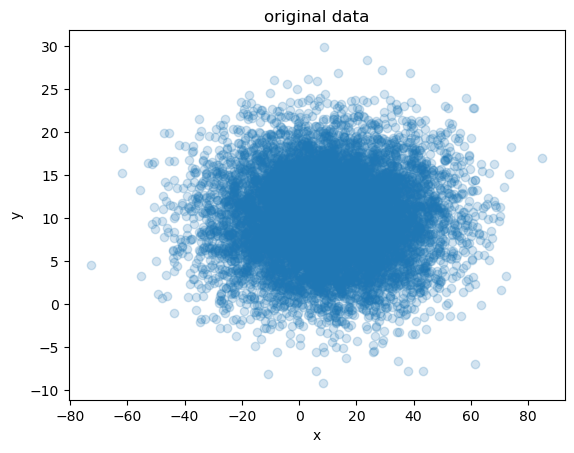

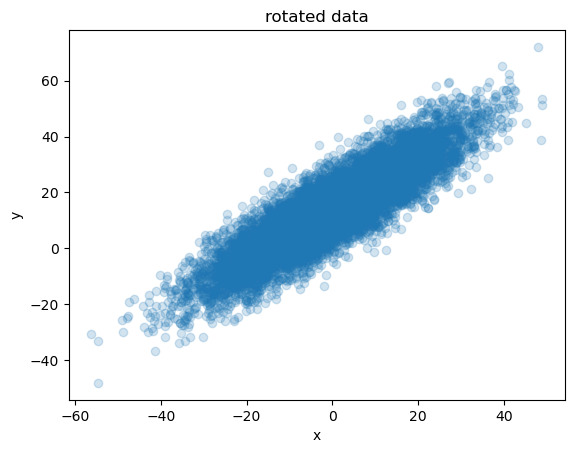

In [33]:
# Generate the data
np.random.seed(92425) # for reproducibility
x = np.random.normal(loc=10,scale=20,size=10000)
y = np.random.normal(loc=10,scale=5,size=10000)
sample = np.vstack([x,y]).T

# Make a scatterplot
plt.figure()
plt.scatter(sample[:,0],sample[:,1],alpha=0.2)
plt.title("original data")
plt.xlabel("x")
plt.ylabel("y")

# Rotate the data
rad = -np.pi/4.0
rot = np.array([[np.cos(rad),-np.sin(rad)],[np.sin(rad),np.cos(rad)]])
sample = np.dot(sample,rot)

# Make a scatterplot
plt.figure()
plt.scatter(sample[:,0],sample[:,1],alpha=0.2)
plt.title("rotated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The resulting dataset is normally distributed along the two diagonals. What PCA does is find the vector that captures the most variance and assigns it to first "principle component" (PC1), then finds the next vector that is orthogonal to the PC1 that captures the next most variance and assigns it to PC2, and so on for higher dimensional datasets. For the current dataset, we would expect PC1 to be the unit vector along (1,1) and PC2 to be the unit vector along (1,-1) (the sign is ambiguous, each can be multiplied by -1 and still correspond to the same direction).

Let's write our own PCA algorithm (explanation will be deferred until later on):

In [34]:
# Our own PCA function
def pca(X,std=True):
  
  # remove mean from each column
  Xmean = X.mean(axis=0)
  TMP = X - Xmean

  # Normalize columns by standard deviation
  if std:
      TMP = TMP/TMP.std(axis=0)
    
  # Compute the covariance matrix
  C = np.dot(TMP.T, TMP) / ((len(TMP[0])-1)*len(TMP))

  # Perform the Eigen decomposition
  evals, evecs = np.linalg.eig(C)
  ind = np.argsort(evals)[::-1] # sort descending
  evals = evals[ind] # sort evals
  evecs = evecs[:,ind] # sort evecs

  # Project X onto PC space, scale by std, and add back the mean
  X_pca = np.dot(TMP, evecs)
  X_pca = X_pca + np.dot(Xmean,evecs)

  return X_pca,evecs,evals

Now let's plot the results of the transformed data and the principle components:

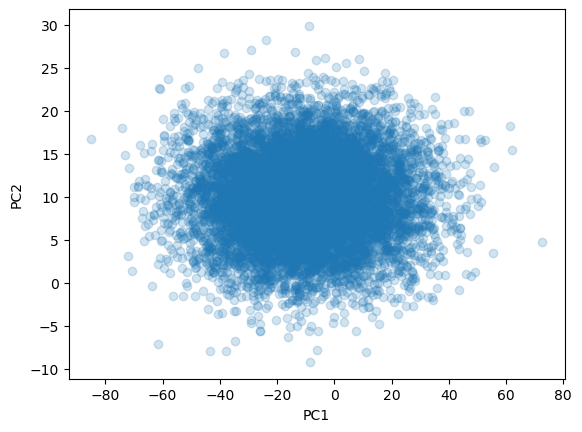

[[-11.39574652  10.89616466]
 [ -2.82192773   5.53120101]
 [  9.91352814  10.06236973]
 ...
 [  7.53817447   8.66431994]
 [ -4.7427802    6.48928862]
 [ 13.5545723   12.89113061]]
[[-0.70506363 -0.70914405]
 [-0.70914405  0.70506363]]
[397.73687792  24.98189859]


In [35]:
sample_pca,PCs,vars = pca(sample,std=False)
# Make a scatterplot
plt.scatter(sample_pca[:,0],sample_pca[:,1],alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
print(sample_pca)
print(PCs)
print(vars)

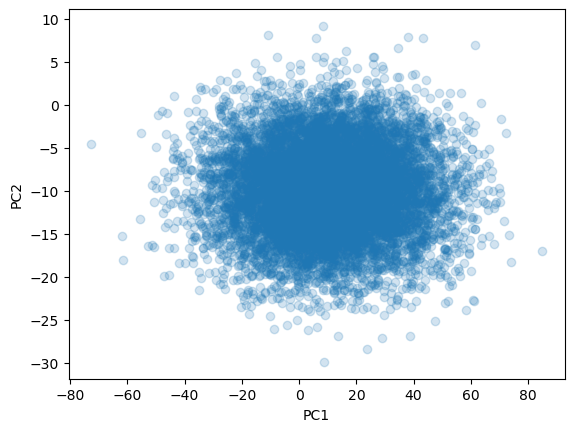

In [36]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit((sample-sample.mean(axis=0))/sample.std(axis=0))
sample_pca = model.transform(sample)
plt.scatter(sample_pca[:,0],sample_pca[:,1],alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Here the `pca()` function that we've written returns the original data, but rotated to align with the principle components (`sample_pca`). When we plot this data we see that the largest variance lies along PC1 and the second largest variance lies along PC2. Note, by default PC analyses typically rescale each dimension by its variance before performing the transformation to control for potential differences in units, relative variances are still conserved.

So what has PCA done? For an N-dimensional dataset, it finds a set $\mathbf{N}'$ of new vectors (the principal components). The vectors $\mathbf{N}'$ are required to be (i) orthogonal to one another, and (ii) linear combinations of the original $\mathbf{N}$ vectors. More usefully, the vectors in $\mathbf{N}'$ are selected so that the data shows the largest possible variance along $N'_1$ (i.e., PC1); then given $N'_1$, $N'_2$ is selected to be orthogonal to $N'_1$ and so that the data shows the largest possible variance along $N'_2$; then given $N'_1$ and $N'_2$, $N'_3$ is selected to be orthogonal to $N'_1$ and $N'_2$ and so that the data shows the largest possible variance along $N'_3$; and so on. 

#### Additional Details (optional)
I've told you <i>what</i> PCA does, but not <i>how</i> it does it. Given the broad composition of the students in this course, you may not have the linear algebra background required to fully understand the details. In brief, consider a dataset with $M$ samples and $N$ variables (e.g., $N$ sensor readings at $M$ times). After centering the data about $\mathbf{0}$, the covariance matrix

$$ \mathbf{C} = \frac{\mathbf{X}^\mathrm{T}\mathbf{X}}{(N-1)(M)} $$

holds the covariance of the data along variable $i$ and $j$ at the position $C_{ij}$, where $C_{ii}$ is the variance along is specific direction $i$. This matrix has all of the information we need to find our principle components: it has the variances and covariances and these are the things we are trying to maximize in our new direction vectors (the PCs). It can be shown that the eigenvectors of $C$, sorted by their eigenvalue, are the PCs we are after. After the eigendecomposition of C

$$ \mathbf{C} = \mathbf{W}\mathbf{\Lambda}\mathbf{W}^\mathrm{T} $$

the matrix $\mathbf{W}$ (NxN) holds the eigenvectors of $\mathbf{C}$ along its columns and $\mathbf{\Lambda}$ (NxN) is a matrix with the eigenvalues of $\mathbf{C}$ along its diagonal and zeros elsewhere. Revisiting the function that we wrote:

In [37]:
# Our own PCA function
def pca(X,std=True):
  
  # remove mean from each column
  Xmean = X.mean(axis=0)
  TMP = X - Xmean

  # Normalize columns by standard deviation
  if std:
      TMP = TMP/TMP.std(axis=0)
    
  # Compute the covariance matrix
  C = np.dot(TMP.T, TMP) / ((len(TMP[0])-1)*len(TMP))

  # Perform the Eigen decomposition
  evals, evecs = np.linalg.eig(C)
  ind = np.argsort(evals)[::-1] # sort descending
  evals = evals[ind] # sort evals
  evecs = evecs[:,ind] # sort evecs

  # Project X onto PC space, scale by std, and add back the mean
  X_pca = np.dot(TMP, evecs)
  X_pca = X_pca + np.dot(Xmean,evecs)

  return X_pca,evecs,evals

You can see that we take in a data matrix `X` then (1) subtract the mean of each column to center the data about $\mathbf{0}$, (2) normalize by the standard deviation of each column (controls for units) (3) calculate the covariance matrix, (4) calculate the eigendecomposition using the `np.linalg.eig()` function, (5) sort the eigenvalues and eigenvectors in descending order (`np.argsort()` commands), (6) project the original data onto our new vectors (`np.dot(TMP,evecs)`), (7) (optionally, not always done) add back the mean of each column in the transformed coordinates (`X_pca + np.dot(Xmean,evecs)`), and (8) return the transformed data, eigenvector/PCs, and eigenvalues. Here we have relied on the fact that `np.linalg.eig()` returns normalized eigenvectors. Additionally, the reason that we normalize the columns by the standard deviation is that this controls for different scales in the data that might simply be an artifact of units (e.g., if one column was in mg and another was in kg, the column in mg might exhibit a larger variance due solely to its smaller units).  

Why do we bother returning the eigenvalues? These are actually informative, since they hold the variance along each PC after the transformation:

In [38]:
sample_pca,PCs,vars = pca(sample)
print("PCs (along columns):\n{}\n".format(PCs))
print("evals:\n{}\n".format(vars))
print("variance:\n{}\n".format(sample_pca.std(axis=0)**(2.0)))

PCs (along columns):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

evals:
[1.88180043 0.11819957]

variance:
[1.88180043 0.11819957]



In the above cell we compare the eigenvalues with the variance of the transformed data (calculated explicitly) and see that they are equal. An alternative way of using the eigenvalues is to report each normalized by the sum of eigenvalues, which tells you what fraction of the total variance in the data is described by each PC.

In [39]:
tot = sum(vars)/100.0 
for count_i,i in enumerate(vars):
    print("PC{}: {: 6.2f} ({:4.2f}%)".format(count_i+1,i,i/tot))

PC1:   1.88 (94.09%)
PC2:   0.12 (5.91%)


#### PCA - Dow Dataset
Now that we've gone over the basics of PCA let's use it to help analyze the Dow dataset. In particular, this is a relatively large dataset, with many descriptor variables (`x:`). When we were previously discussing correlations, we found some interesting results when we looked at pairs of the most correlated variables, but we were limited from exhaustively exploring these relationships by the sheer number of variables. This is where PCA becomes useful. 

By transforming the data that we've been given from a coordinate frame defined by the `x:` variables into a coordinate frame of PCs, we can focus on the dimensions that explain most of the variance in the data. Let's calculate the PCs  for our dataset:

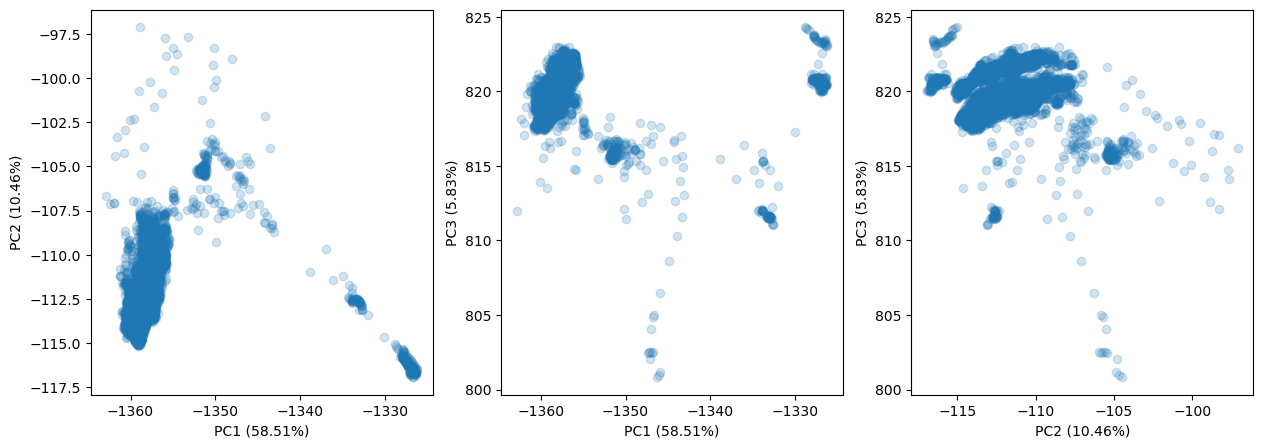

In [40]:
dow_x = dow.iloc[:,1:41].to_numpy() # grab the x-data 
dow_x_pca,PCs,vars = pca(dow_x) # PCA analysis

# Make a scatterplots of first three principle components
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.scatter(dow_x_pca[:,0],dow_x_pca[:,1],alpha=0.2)
ax.set_xlabel("PC1 ({:<4.2f}%)".format(vars[0]/sum(vars)*100.0))
ax.set_ylabel("PC2 ({:<4.2f}%)".format(vars[1]/sum(vars)*100.0))

ax = plt.subplot(1,3,2)
ax.scatter(dow_x_pca[:,0],dow_x_pca[:,2],alpha=0.2)
ax.set_xlabel("PC1 ({:<4.2f}%)".format(vars[0]/sum(vars)*100.0))
ax.set_ylabel("PC3 ({:<4.2f}%)".format(vars[2]/sum(vars)*100.0))

ax = plt.subplot(1,3,3)
ax.scatter(dow_x_pca[:,1],dow_x_pca[:,2],alpha=0.2)
ax.set_xlabel("PC2 ({:<4.2f}%)".format(vars[1]/sum(vars)*100.0))
ax.set_ylabel("PC3 ({:<4.2f}%)".format(vars[2]/sum(vars)*100.0))

plt.show()


In the above cell we have performed the PCA transformation and plotted the data with respect to the first three PCs and reported the %variance along each. We can see from the variances that PC1 alone captures a majority of the variability in the values. In combination, PC1-PC3 capture 75% of the variance. Looking at these numbers, the PC analysis has automatically ascertained what we observed earlier in the correlation analysis: a lot of these variables are correlated and aren't providing much indpendent information. Using only 3 variables we can describe a supermajority of the variance. 

Let's look closer at the PC1 vs PC2 plot and color the data according to impurity:

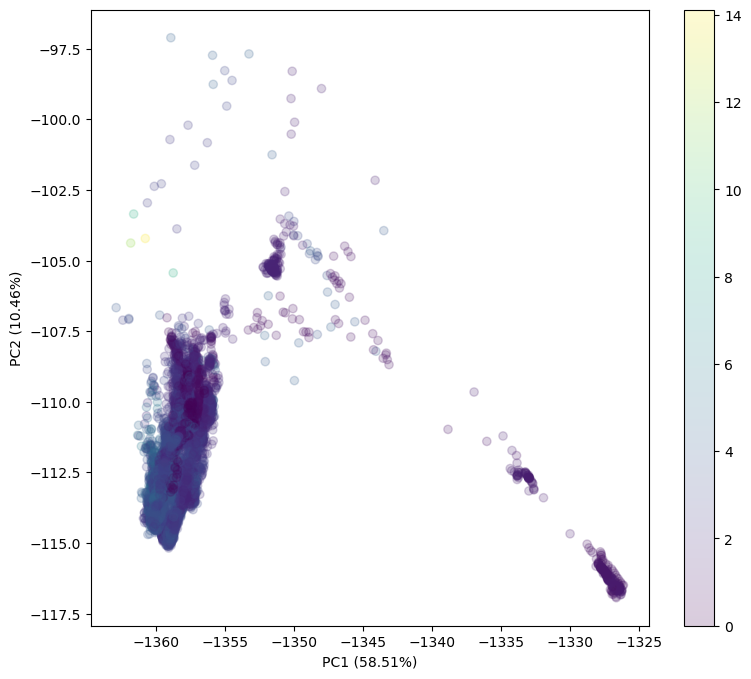

In [41]:
plt.figure(figsize=(9,8))
plt.scatter(dow_x_pca[:,0],dow_x_pca[:,1],alpha=0.2,c=dow["y"],cmap="viridis")
plt.xlabel("PC1 ({:<4.2f}%)".format(vars[0]/sum(vars)*100.0))
plt.ylabel("PC2 ({:<4.2f}%)".format(vars[1]/sum(vars)*100.0))
plt.colorbar()
plt.show()

Looking at this figure, we can see a clear separation between values when the plant is operating with PC1<-1353 and PC2<-106. Along the diagonal there are relatively fewer points. We can experiment with using the PC values in this way for identifying outliers:

N outliers: 450 (4.37%)


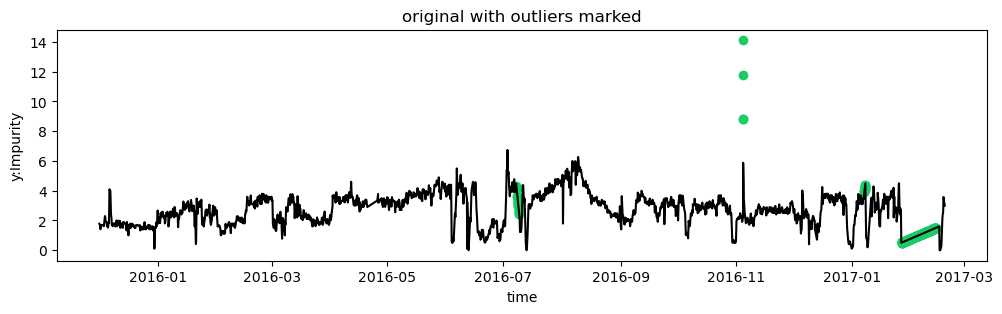

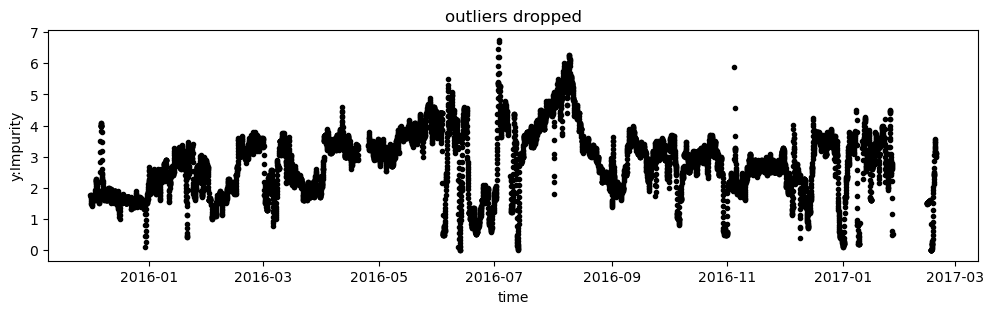

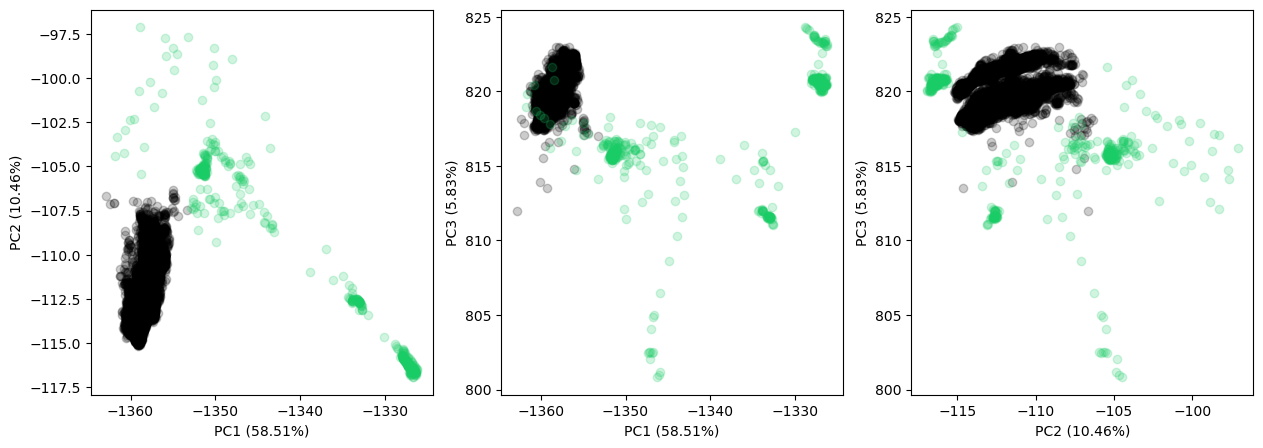

In [42]:
# Separate clusters based on PC1 and PC2
i_inds = [ _ for _ in range(len(dow_x_pca)) if dow_x_pca[_,0] < -1353 and dow_x_pca[_,1] < -106 ]
o_inds = [ _ for _ in range(len(dow_x_pca)) if _ not in i_inds ]
print("N outliers: {} ({:<4.2f}%)".format(len(o_inds),len(o_inds)/len(dow_x_pca)*100.0))

# Plot original data with outliers marked
plt.figure(figsize=(12,3))
plt.plot(dow.iloc[o_inds,0],dow.iloc[o_inds,-3],marker='o',color=(0.1,0.8,0.4),linestyle='None')
plt.plot(dow.iloc[i_inds,0],dow.iloc[i_inds,-3],color="k")
plt.xlabel("time")
plt.ylabel("y:Impurity")
plt.title("original with outliers marked")

# Plot original data with outliers replaced by median
plt.figure(figsize=(12,3))
plt.plot(dow.iloc[i_inds,0],dow.iloc[i_inds,-3],marker='.',color="k",linestyle="None")
plt.xlabel("time")
plt.ylabel("y:Impurity")
plt.title("outliers dropped")

# Make scatterplots of first three principle components with outliers marked
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.scatter(dow_x_pca[i_inds,0],dow_x_pca[i_inds,1],c="k",alpha=0.2)
ax.scatter(dow_x_pca[o_inds,0],dow_x_pca[o_inds,1],c=[(0.1,0.8,0.4)],alpha=0.2)
ax.set_xlabel("PC1 ({:<4.2f}%)".format(vars[0]/sum(vars)*100.0))
ax.set_ylabel("PC2 ({:<4.2f}%)".format(vars[1]/sum(vars)*100.0))

ax = plt.subplot(1,3,2)
ax.scatter(dow_x_pca[i_inds,0],dow_x_pca[i_inds,2],c="k",alpha=0.2)
ax.scatter(dow_x_pca[o_inds,0],dow_x_pca[o_inds,2],c=[(0.1,0.8,0.4)],alpha=0.2)
ax.set_xlabel("PC1 ({:<4.2f}%)".format(vars[0]/sum(vars)*100.0))
ax.set_ylabel("PC3 ({:<4.2f}%)".format(vars[2]/sum(vars)*100.0))

ax = plt.subplot(1,3,3)
ax.scatter(dow_x_pca[i_inds,1],dow_x_pca[i_inds,2],c="k",alpha=0.2)
ax.scatter(dow_x_pca[o_inds,1],dow_x_pca[o_inds,2],c=[(0.1,0.8,0.4)],alpha=0.2)
ax.set_xlabel("PC2 ({:<4.2f}%)".format(vars[1]/sum(vars)*100.0))
ax.set_ylabel("PC3 ({:<4.2f}%)".format(vars[2]/sum(vars)*100.0))

plt.show()

Impressively, the PCA analysis automatically identified the anomolous region in Feb 2017 where the impurity data became linear.

When we previously investigated the correlation plots, we also saw a separation between the temperature variables that appeared to be "on" vs "off" behavior. Let's see if the PCA analysis also picked up this distinction.

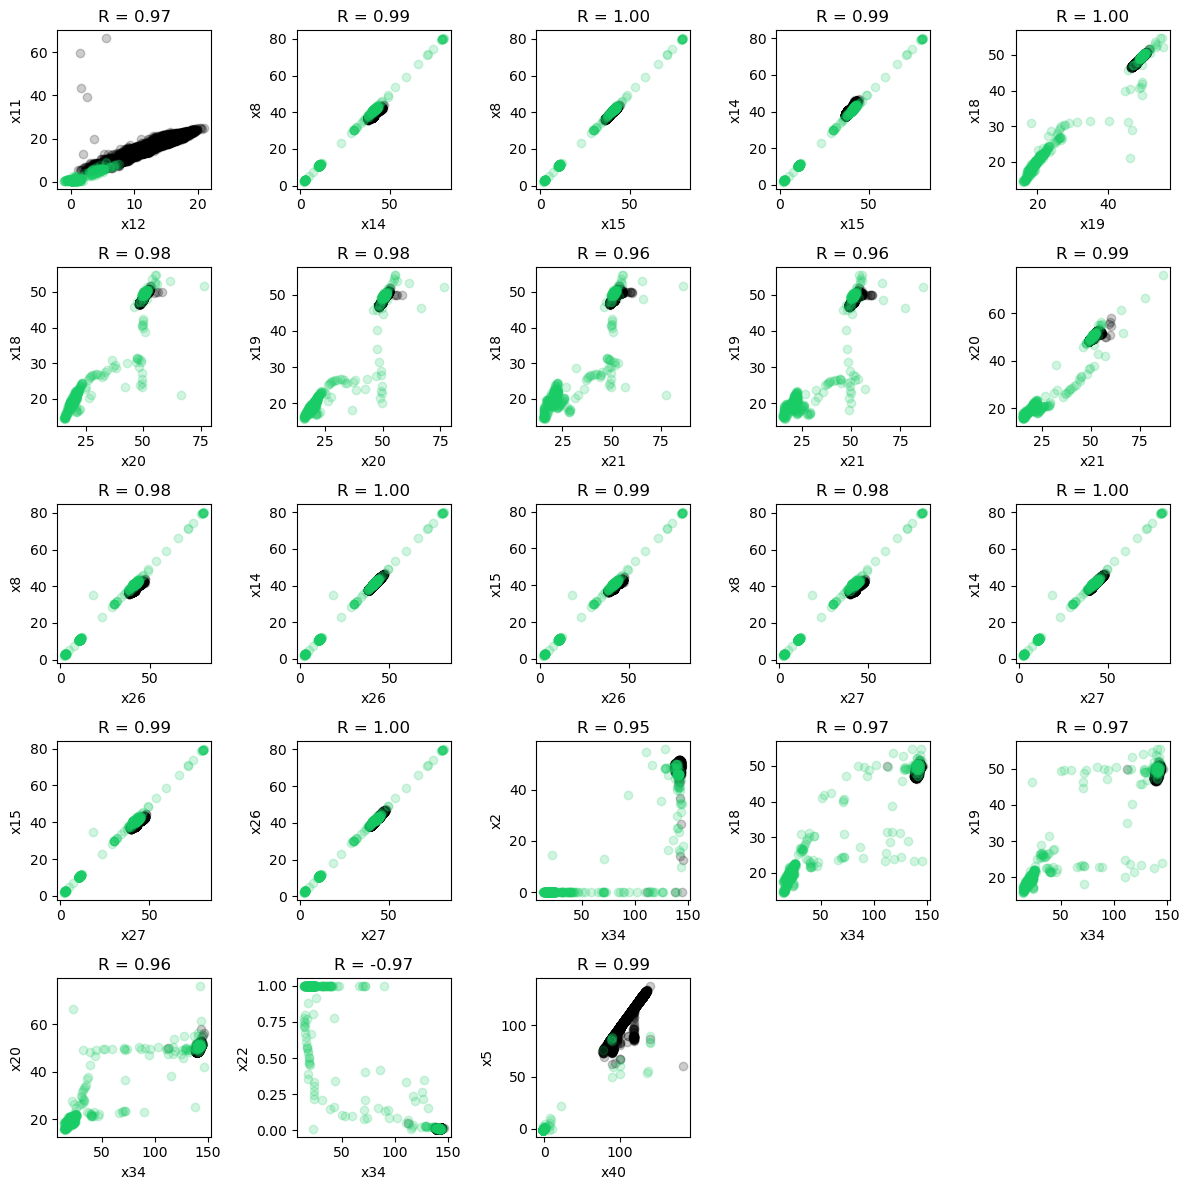

N outliers: 450 (4.37%)


In [43]:
# Find linearly correlated features 
# There is probably a solution with Pandas .where() that is workable as well. I'm more comfortable with arrays.
corr = dow.corr()
corr_array = corr.abs().to_numpy()[:-5,:-5] # return a numpy array with only absolute values of "xINT:" variables
row,col = np.where((corr_array > 0.95) & (corr_array < 1)) # find positions where correlation mags are >0.95 and !=1
labels = [ (corr.index[row[_]],corr.columns[col[_]]) for _ in range(len(row)) if row[_] > col[_] ] # find labels/cols

### Correlation Grid of features
plt.figure(figsize=(12,12))
inc = -1
for i in range(len(labels)):
  ax = plt.subplot(5,5,i+1)
  ax.scatter(dow.loc[:,labels[i][0]].iloc[i_inds],dow.loc[:,labels[i][1]].iloc[i_inds],c='k',alpha=0.2)
  ax.scatter(dow.loc[:,labels[i][0]].iloc[o_inds],dow.loc[:,labels[i][1]].iloc[o_inds],c=[(0.1,0.8,0.4)],alpha=0.2)
  ax.set_title("R = {:<3.2f}".format(corr.loc[labels[i][0],labels[i][1]]))
  ax.set_xlabel(labels[i][0].split(":")[0])
  ax.set_ylabel(labels[i][1].split(":")[0])
plt.tight_layout()
plt.show()
print("N outliers: {} ({:<4.2f}%)".format(len(o_inds),len(o_inds)/len(dow)*100.0))

PCA observed the same thing we did, the plant seems to exhibit two states, "on" and "off". Looking at the temperature variables, `x34`, `x18`, and `x19`, we see that the low temperature regions have been identified as outliers (green). 

Looking at these plots, it looks like the outliers outnumber the regular operation data. However, only 450 samples (4% of the total) are identified as outliers using our PC1 and PC2 criteria. Thus, the overwhelming majority of the data is bunched in the tiny black clusters shown in the correlation plots. This demonstrates how large of an impact this data has on our analysis, and the need to remove it prior to building a predictive model or providing an analysis of the plant during normal operating conditions. 